In [2253]:
!pip install Faker

import numpy as np
import pandas
pandas.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import dateutil
import datetime

from numpy.random import multivariate_normal

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, accuracy_score

from scipy.stats import zscore

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# Enter the route to your datasets below

dataset = pandas.read_csv("../input/tarea-final/heart_failure_clinical_records_dataset.csv")


/kaggle/input/tarea-final/heart_failure_clinical_records_dataset.csv


# Parte 1

Analisis de los datos del dataset.
Se realizo una investigacion sobre los features para comprender en profundidad su significado y aporte al dataset.
* Age: Edad del paciente
* Anemia: afección en la cual careces de suficientes glóbulos rojos sanos para transportar un nivel adecuado de oxígeno a los tejidos del cuerpo.
* Creatina fosfocinasa: enzima que está presente en el cuerpo. Se encuentra predominantemente en el corazón, el cerebro y el músculo esquelético
* Diabetes: enfermedad en la que los niveles de glucosa (azúcar) de la sangre están muy altos.
* Fracción de Eyección: medición, expresada como un porcentaje, de la cantidad de sangre que el ventrículo izquierdo bombea hacia fuera con cada contracción. 
* Presion arterial alta: afección frecuente en la que la fuerza que ejerce la sangre contra las paredes de tus arterias con el transcurso del tiempo es lo suficientemente alta como para poder causarte problemas de salud, como una enfermedad cardíaca
* Plaquetas: fragmentos de células muy grandes de la médula ósea que se llaman megacariocitos. Ayudan a producir coágulos sanguíneos para hacer más lento el sangrado o frenarlo y para facilitar la cicatrización de las heridas
* Suero de Creatinina: compuesto químico que resulta de los procesos de producción de energía de los músculos
* Sodio serico: Cantidad de sodio en la sangre. Es necesario para que las celulas del cuertpo funcionen correctamente.
* Time: Tiempo de seguimiento
* Sexo: 0 indica paciente mujer y 1 indica paciente hombre
* Fuma: indica si el paciente es fumador o no
* Evento de muerte: Indica si el paciente murio durante el periodo de seguimiento.

A continuacion se muestran las primeras 5 entradas del dataset.

In [2254]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Se averigua el tipo de cada uno de los features y cuantos valores no nulos contiene. En este caso se puede ver que el dataset tiene 299 filas y ningun valor nulo.

In [2255]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


A continuacion se obtienen algunas estadisticas del dataset como el promedio de cada feature, la cantidad, la desviacion estandar y los principales cuartiles.

In [2256]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Para cada una de las variables no binarias, se grafica un histograma para ver cuantas ocurrencias tiene cada valor y poder observar a grandes rasgos la distribucion que sigue cada feature. 

<AxesSubplot:title={'center':'Serum Creatinine Distribution'}, xlabel='serum_creatinine', ylabel='Count'>

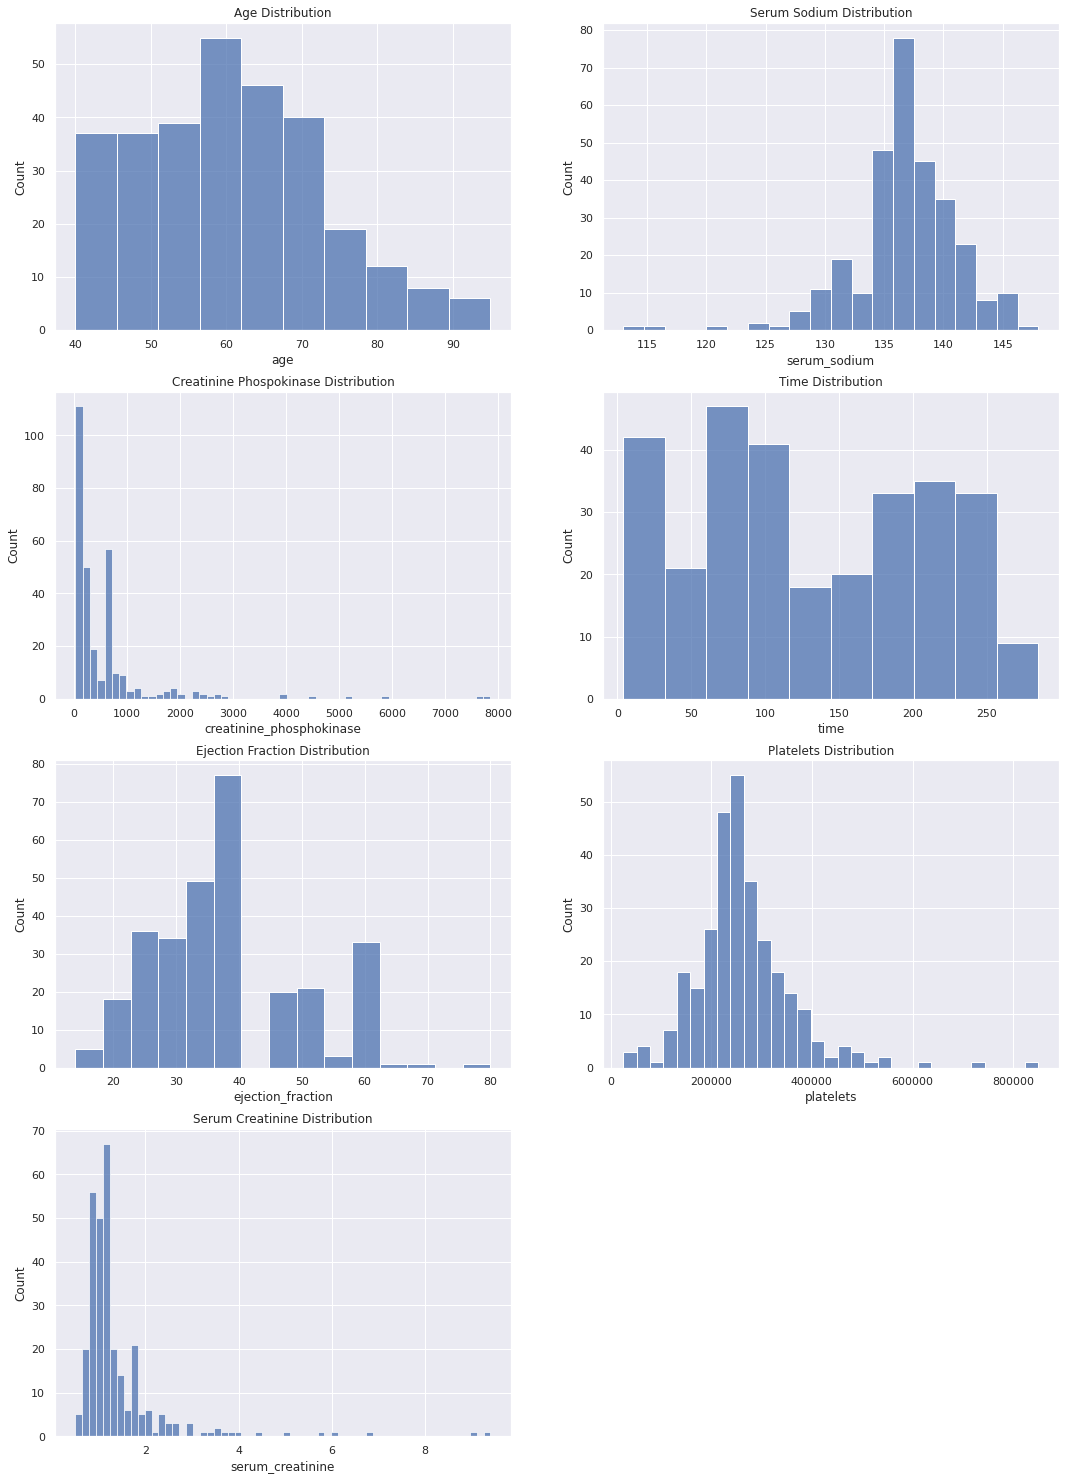

In [2257]:
fig = plt.figure(figsize = (18, 26)).tight_layout(h_pad=5.0, w_pad = 5.0)

plt.subplot(421)
plt.title('Age Distribution')
sns.histplot(dataset.age)

plt.subplot(422)
plt.title('Serum Sodium Distribution')
sns.histplot(dataset.serum_sodium)

plt.subplot(423)
plt.title('Creatinine Phospokinase Distribution')
sns.histplot(dataset.creatinine_phosphokinase)

plt.subplot(424)
plt.title('Time Distribution')
sns.histplot(dataset.time)

plt.subplot(425)
plt.title('Ejection Fraction Distribution')
sns.histplot(dataset.ejection_fraction)

plt.subplot(426)
plt.title('Platelets Distribution')
sns.histplot(dataset.platelets)

plt.subplot(427)
plt.title('Serum Creatinine Distribution')
sns.histplot(dataset.serum_creatinine)

Para las binarias, se realizaron las graficas analogas para mostrar cuantos registros contienen cada valor (0 y 1).
Se puede observar que la muestra contiene mayor cantidad de hombres que de mujeres. Tambien se ve que el numero de pacientes que muere en el periodo de seguimiento es menor al de sobrevivientes.
Ademas, la mayoria de los estudiados no tiene presion alta ni tampoco fuma.

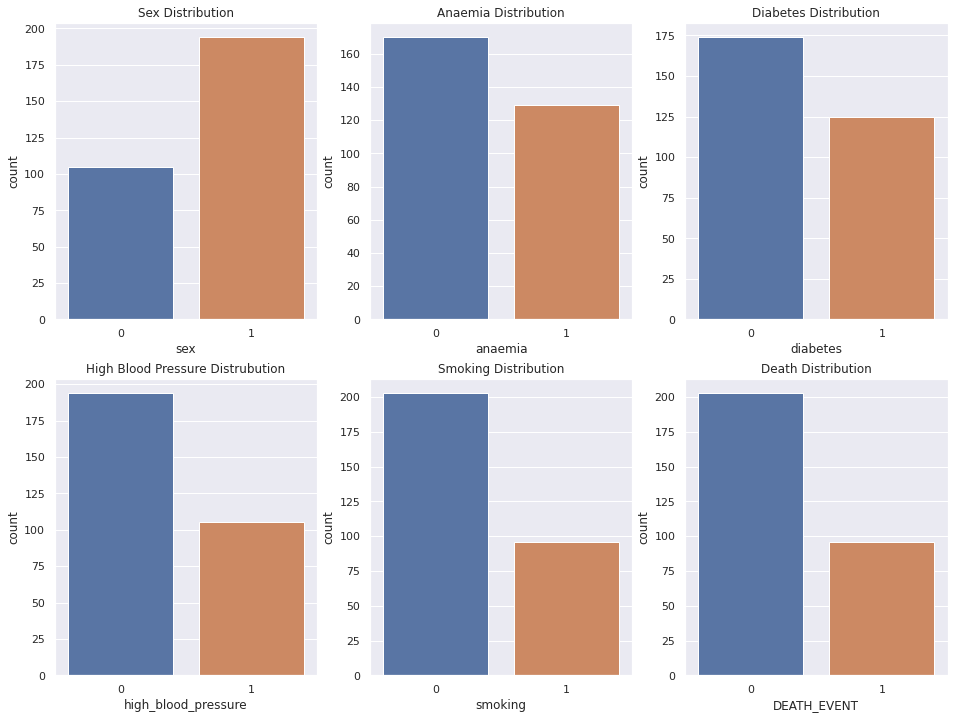

In [2258]:
fig = plt.figure(figsize = (16, 12)).tight_layout(pad=3.0)

plt.subplot(231)
plt.title('Sex Distribution')
sns.countplot(x=dataset.sex)

plt.subplot(232)
plt.title('Anaemia Distribution')
sns.countplot(x=dataset.anaemia)

plt.subplot(233)
plt.title('Diabetes Distribution')
sns.countplot(x=dataset.diabetes)

plt.subplot(234)
plt.title('High Blood Pressure Distrubution')
sns.countplot(x=dataset.high_blood_pressure)

plt.subplot(235)
plt.title('Smoking Distribution')
sns.countplot(x=dataset.smoking)

plt.subplot(236)
plt.title('Death Distribution')
sns.countplot(x=dataset.DEATH_EVENT)

plt.show()

Se estudiara la relacion de cada uno de los features y sus valores contra los valores de DEATH_EVENT. 
Se podra ver aqui cuales son los valores atipicos para cada feature.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

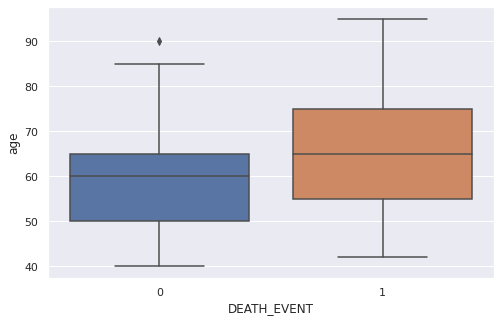

In [2259]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['age'])

Se puede ver que la edad de las personas fallecidas esta entre los 55 y 75 años. 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='anaemia'>

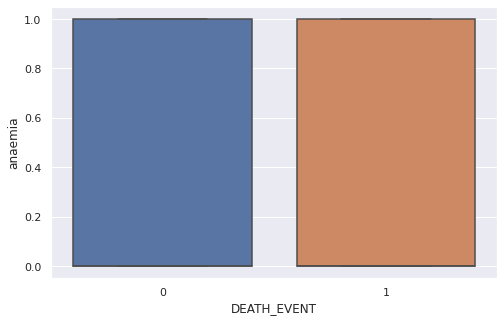

In [2260]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['anaemia'])

Esta grafica indica que la anemia no pareceria tener relacion con la muerte de las personas ya que se divide de manera equitativa entre los que murieron y los que no.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

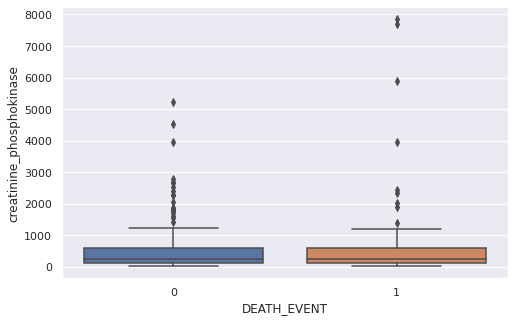

In [2261]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['creatinine_phosphokinase'])

Se puede ver que creatinine_phosphokinase contiene muchos valores atipicos.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='diabetes'>

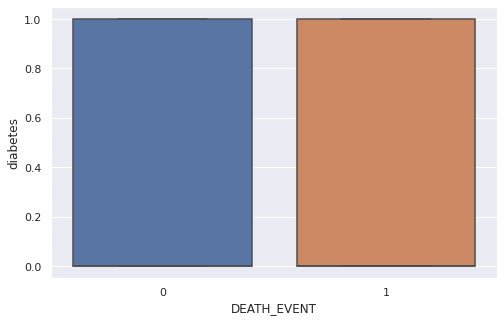

In [2262]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['diabetes'])

Al igual que la anemia, no parece que la diabetes tenga relacion evidente con la muerte de los pacientes

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

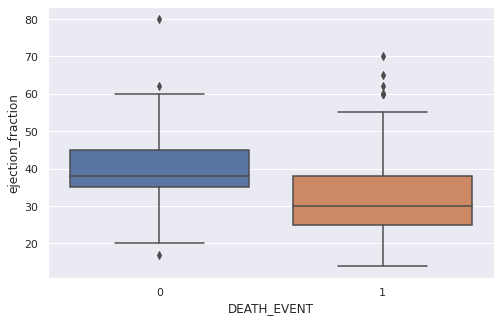

In [2263]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['ejection_fraction'])

En el caso de ejection_fraction, se puede ver que los pacientes que murieron tienen este valor mas bajo que el resto.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='high_blood_pressure'>

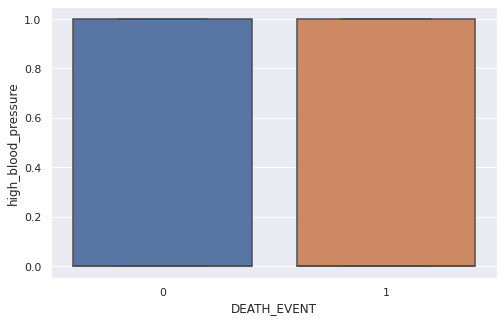

In [2264]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['high_blood_pressure'])

Tampoco tiene relacion evidente con la muerte la presion arterial alta.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

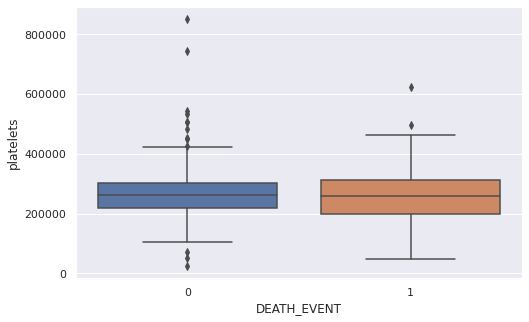

In [2265]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['platelets'])

Hay muchos outliers en este feature y los valores tanto si el paciente murio como si no son similares.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

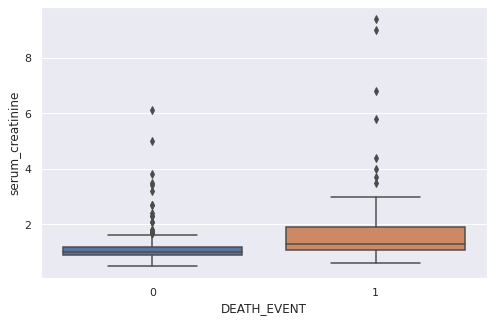

In [2266]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['serum_creatinine'])

En este caso se puede apreciar que los pacientes que murieron tenian mayores niveles de serum_creatinine. Tambien se pueden ver muchos valores atipicos.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

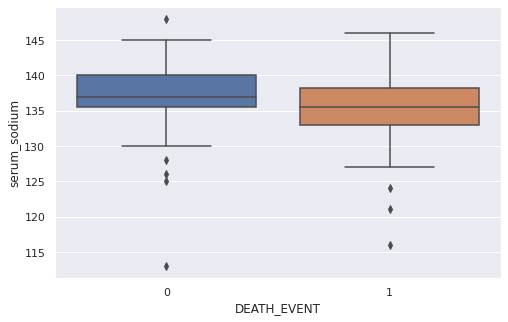

In [2267]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['serum_sodium'])

Al igual que en ejection_fraction, la relacion con DEATH_EVENT parece ser negativa. 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='sex'>

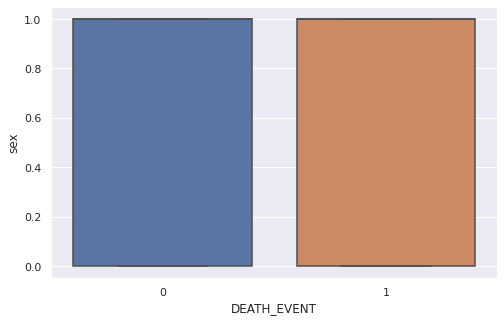

In [2268]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['sex'])

El sexo no genera mayor o menor tendencia a sufrir una muerte cardiaca

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='smoking'>

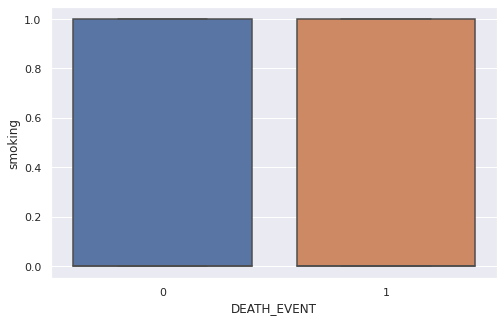

In [2269]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['smoking'])

Tampoco se observa una relacion evidente entre los pacientes fumadores y el evento de muerte cardiaca

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

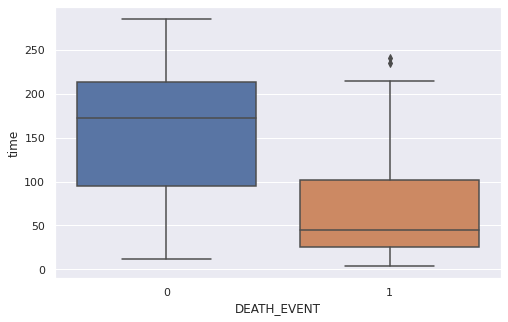

In [2270]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=dataset['DEATH_EVENT'], y=dataset['time'])

Claramente, hay una relacion inversa entre el tiempo de seguimiento y la muerte. Se puede suponer que los pacientes con menor tiempo de seguimiento padecian mas enfermedades y no las atendieron a tiempo.

en dataOut, se guardara el dataset sacando los valores atipicos de cada feature que se pudieron observar en los distintos box plots

In [2271]:
dataOut=dataset # eliminamos los outliers
dataOut = dataOut.drop(dataOut[dataOut['age'] > 85].index)
dataOut = dataOut.drop(dataOut[dataOut['creatinine_phosphokinase'] > 1000].index)
dataOut = dataOut.drop(dataOut[dataOut['ejection_fraction'] > 55].index)
dataOut = dataOut.drop(dataOut[dataOut['ejection_fraction'] < 20].index)
dataOut = dataOut.drop(dataOut[dataOut['platelets'] > 400000].index)
dataOut = dataOut.drop(dataOut[dataOut['platelets'] < 100000].index)
dataOut = dataOut.drop(dataOut[dataOut['serum_creatinine'] > 2].index)
dataOut = dataOut.drop(dataOut[dataOut['serum_sodium'] > 145].index)
dataOut = dataOut.drop(dataOut[dataOut['serum_sodium'] < 130].index)
dataOut = dataOut.drop(dataOut[dataOut['time'] > 225].index)

Resulta un dataset con 142 entradas

In [2272]:
dataOut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 256
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       142 non-null    float64
 1   anaemia                   142 non-null    int64  
 2   creatinine_phosphokinase  142 non-null    int64  
 3   diabetes                  142 non-null    int64  
 4   ejection_fraction         142 non-null    int64  
 5   high_blood_pressure       142 non-null    int64  
 6   platelets                 142 non-null    float64
 7   serum_creatinine          142 non-null    float64
 8   serum_sodium              142 non-null    int64  
 9   sex                       142 non-null    int64  
 10  smoking                   142 non-null    int64  
 11  time                      142 non-null    int64  
 12  DEATH_EVENT               142 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 15.5 KB


Por otro lado en dataOut2 se guarda el dataset sin outliers pero eliminandolos usando el zscore. 
En este caso, resulta un dataset de 276 entradas

In [2273]:
print(dataset.shape)
newDataset = dataset
z = np.abs(zscore(newDataset))
outliers_position = []
for i in np.where(z > 3):
    outliers_position = np.concatenate((outliers_position, i))
final_outliers = list(dict.fromkeys(outliers_position))
print(len(final_outliers))
dataOut2 = dataset.drop(final_outliers)
print(dataOut2.shape)

(299, 13)
23
(276, 13)


se estudia y grafica la correlacion entre todas las variables del dataset con outliers 2 a 2

In [2274]:
dataset.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


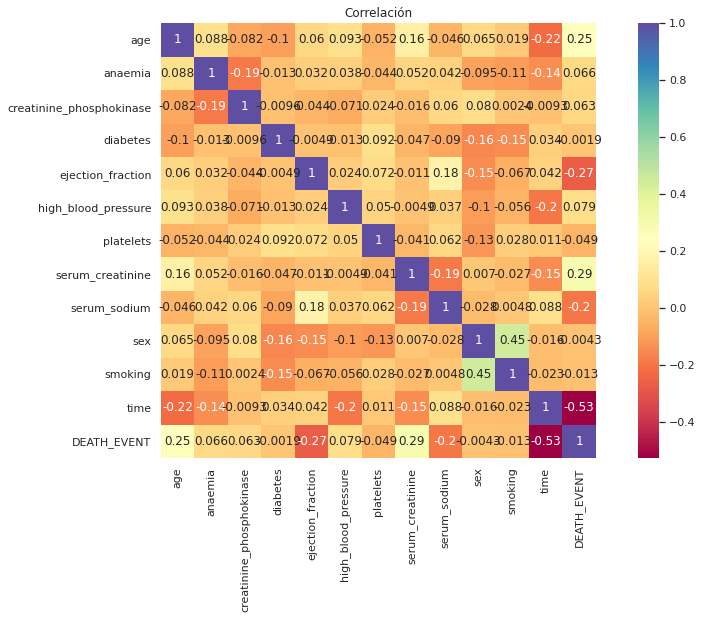

In [2275]:
cm = sns.color_palette("Spectral", as_cmap=True)
plt.figure(figsize=(15, 8))
sns.heatmap(dataset.corr(), annot = True, square=True, cmap=cm)
plt.title('Correlación')
plt.show()

se estudia y grafica la correlacion entre todas las variables del dataset sin outliers usando el metodo del box plot 2 a 2

In [2276]:
dataOut.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,-0.031408,0.103434,0.040023,0.025271,0.133478,-0.140978,0.248650,-0.074775,0.082544,0.028157,-0.211509,0.255470
anaemia,-0.031408,1.000000,-0.234630,-0.077675,-0.071830,0.022026,0.057570,0.024772,0.126989,-0.086801,-0.130341,0.002902,0.049893
creatinine_phosphokinase,0.103434,-0.234630,1.000000,-0.038876,-0.015784,0.000340,0.066535,0.098244,-0.077185,0.046560,-0.036337,0.025012,0.099593
diabetes,0.040023,-0.077675,-0.038876,1.000000,0.078031,0.132906,0.063554,0.042407,-0.123884,-0.221546,-0.085682,-0.030607,0.023120
ejection_fraction,0.025271,-0.071830,-0.015784,0.078031,1.000000,-0.010846,0.027771,-0.186853,0.054566,-0.109384,-0.078138,0.081624,-0.321126
high_blood_pressure,0.133478,0.022026,0.000340,0.132906,-0.010846,1.000000,0.056274,-0.043620,-0.081479,-0.202360,-0.164718,-0.254287,0.158131
platelets,-0.140978,0.057570,0.066535,0.063554,0.027771,0.056274,1.000000,-0.037226,0.014302,-0.124036,-0.001518,0.028622,0.003852
serum_creatinine,0.248650,0.024772,0.098244,0.042407,-0.186853,-0.043620,-0.037226,1.000000,-0.178460,0.138992,-0.089938,-0.113888,0.359862
serum_sodium,-0.074775,0.126989,-0.077185,-0.123884,0.054566,-0.081479,0.014302,-0.178460,1.000000,-0.049149,0.090920,-0.149386,0.016186
sex,0.082544,-0.086801,0.046560,-0.221546,-0.109384,-0.202360,-0.124036,0.138992,-0.049149,1.000000,0.520995,-0.038769,0.091498


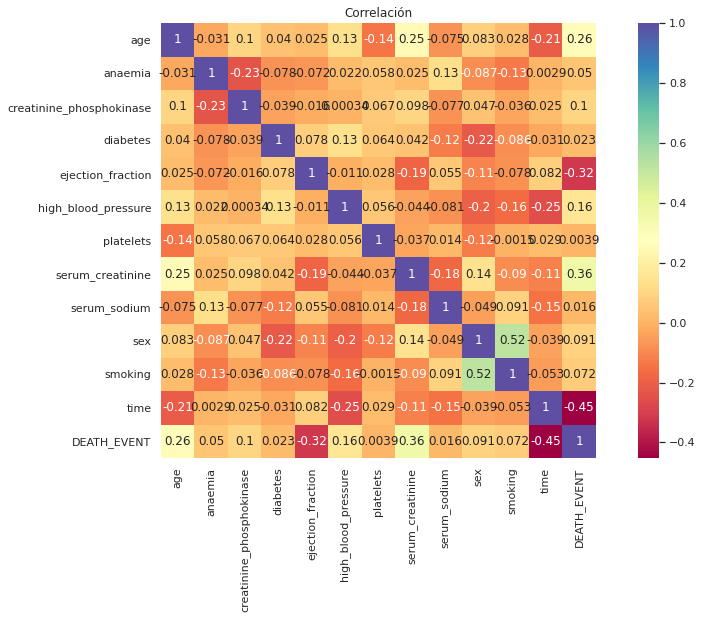

In [2277]:
cm = sns.color_palette("Spectral", as_cmap=True)
plt.figure(figsize=(15, 8))
sns.heatmap(dataOut.corr(), annot = True, square=True, cmap=cm)
plt.title('Correlación')
plt.show()

se estudia y grafica la correlacion entre todas las variables del dataset sin outliers usando el metodo de zscore 2 a 2


In [2278]:
dataOut2.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.075777,-0.096691,-0.077231,0.118165,0.091550,-0.020212,0.232562,-0.032709,0.056754,-0.005329,-0.231147,0.254500
anaemia,0.075777,1.000000,-0.147116,-0.021245,0.041413,0.016493,-0.024932,-0.049107,0.093036,-0.096077,-0.100860,-0.136997,0.037550
creatinine_phosphokinase,-0.096691,-0.147116,1.000000,0.008171,-0.080448,-0.052003,-0.050969,-0.087099,0.059247,0.034349,-0.078444,0.143595,-0.019874
diabetes,-0.077231,-0.021245,0.008171,1.000000,-0.019856,-0.006846,0.050729,-0.051791,-0.063736,-0.164167,-0.144935,0.026286,0.008613
ejection_fraction,0.118165,0.041413,-0.080448,-0.019856,1.000000,0.041467,0.070734,-0.185083,0.187132,-0.103746,-0.042718,0.046081,-0.321982
high_blood_pressure,0.091550,0.016493,-0.052003,-0.006846,0.041467,1.000000,0.057502,-0.052087,-0.003521,-0.108489,-0.056372,-0.240244,0.082179
platelets,-0.020212,-0.024932,-0.050969,0.050729,0.070734,0.057502,1.000000,-0.040065,0.026136,-0.142310,-0.033592,-0.001917,-0.047962
serum_creatinine,0.232562,-0.049107,-0.087099,-0.051791,-0.185083,-0.052087,-0.040065,1.000000,-0.250411,0.094512,-0.006375,-0.160631,0.335134
serum_sodium,-0.032709,0.093036,0.059247,-0.063736,0.187132,-0.003521,0.026136,-0.250411,1.000000,-0.043923,0.026509,0.057792,-0.191686
sex,0.056754,-0.096077,0.034349,-0.164167,-0.103746,-0.108489,-0.142310,0.094512,-0.043923,1.000000,0.442053,-0.003136,0.008685


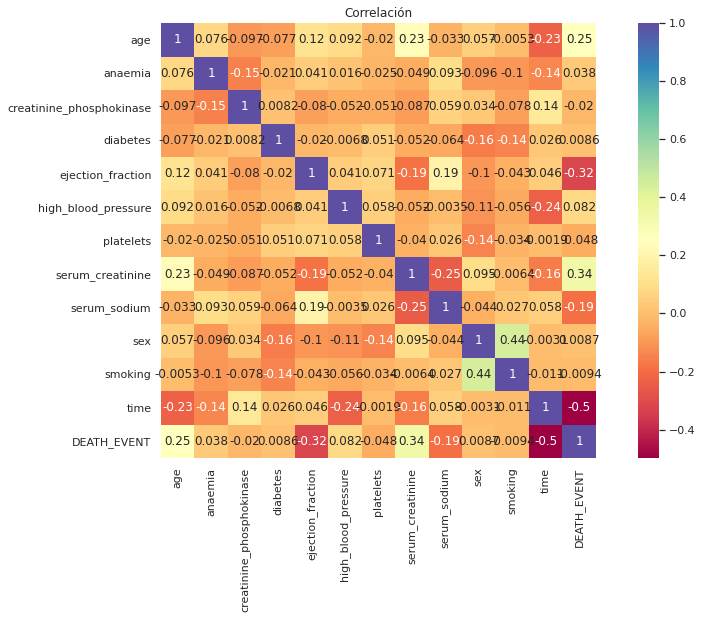

In [2279]:
cm = sns.color_palette("Spectral", as_cmap=True)
plt.figure(figsize=(15, 8))
sns.heatmap(dataOut2.corr(), annot = True, square=True, cmap=cm)
plt.title('Correlación')
plt.show()

# Parte 2

Como se investigo anteriormente, se ve una mayor correlacion entre "death_event" y los siguientes features: age, ejection_fraction, serum_creatinine and time pero se investigara usando 2 metodos (RFE con Logistic regression y RandomForest) cuales son los features mas relevantes en cada una de las clasificaciones. Se usara el dataset al que se le eliminaron los outliers teniendo en cuenta los box plot.

In [2280]:
scaler = MinMaxScaler()
scaler.fit(dataOut)
normalized_data = scaler.transform(dataOut)

pandas_data=pandas.DataFrame(normalized_data, columns=dataset.columns)

x = pandas_data.drop(['DEATH_EVENT'],axis=1)
y = pandas_data['DEATH_EVENT']

spl = 0.8
N = len(y)
sample = int(spl*N)
x_train, x_test, y_train, y_test = x[:sample], x[sample:], y[:sample], y[sample:]

Primero, se averiguara cual es el numero optimo de features a tomar en cuenta

In [2281]:
nof_list=np.arange(1,13)   
high_score=0
nof=0           
score_list = []

for n in range(len(nof_list)):
    model=LogisticRegression(max_iter=10000)
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(x_train,y_train)
    X_test_rfe = rfe.transform(x_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)

Optimum number of features: 3


Se encontro el numero optimo de features relevantes = 3.
Es por eso que, para buscar cuales son esos features con los distintos metodos, se especificara que sean 3.

In [2282]:
scaler = MinMaxScaler()
scaler.fit(dataOut)
normalized_data = scaler.transform(dataOut)

pandas_data=pandas.DataFrame(normalized_data, columns=dataset.columns)

x = pandas_data.drop(['DEATH_EVENT'],axis=1)
y = pandas_data['DEATH_EVENT']

spl = 0.8
N = len(y)
sample = int(spl*N)
x_train, x_test, y_train, y_test = x[:sample], x[sample:], y[:sample], y[sample:]

In [2283]:
lr=LogisticRegression(max_iter=10000)
rfe = RFE(lr, n_features_to_select=3)
rfe.fit(x_train,y_train)
             
isSelected = pandas.Series(rfe.support_,index = x_train.columns)
selected_features_rfe = isSelected[isSelected==True].index
selectedToShow = pandas.DataFrame(selected_features_rfe, 
             columns=['Variables seleccionadas por RFE con Logistic Regression'])
display(selectedToShow)

lr_mask = rfe.support_

,Variables seleccionadas por RFE con Logistic Regression
0,ejection_fraction
1,serum_creatinine
2,time


In [2284]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
importances = []
selected_rfc = []
mask_rfc_fi = []
for i in range(12):
    importances.append({'feature': x.columns[i], 'ranking': rfc.feature_importances_[i]})
newlist = sorted(importances, key=lambda k: k['ranking'], reverse=True)
for i in range(3):
    selected_rfc.append(newlist[i]['feature'])
for i in x.columns:
    if selected_rfc.count(i) > 0:
        mask_rfc_fi.append(1)
    else:
        mask_rfc_fi.append(0)
RFC=pandas.DataFrame(selected_rfc, 
             columns=['Variables seleccionadas por Random Forest Classifier'])
display(RFC)

,Variables seleccionadas por Random Forest Classifier
0,time
1,ejection_fraction
2,serum_creatinine


Para ver con que features trabajar, se agarraran aquellos que fueron recomendados por los dos modelos diferentes.
Estos son: ejection_fraction, serum_creatinine, time

In [2285]:
votes=np.sum([lr_mask, mask_rfc_fi],axis=0)
final_mask=votes>=2
x_final=x.loc[:,final_mask]

selectedToShow = pandas.DataFrame(x_final.columns, 
             columns=['Variables comunes entre los 2'])
display(selectedToShow)

,Variables comunes entre los 2
0,ejection_fraction
1,serum_creatinine
2,time


# Parte 3

Luego de completar el formulario, ademas se le pedira a los posibles asegurados los siguientes estudios:
niveles de ejection_fraction y de serum_creatinine.

Esta decision se basa en los features mas relevantes que nos dieron los modelos, pero ademas en la investigacion sobre el articulo que especifica que, tanto los valores del ejection_fraction como del serum_creatinine, permiten predecir si la persona tendra un accidente cardiovascular.

# Parte 4

Para empezar, se genera un dataset con datos sinteticos para simular las respuestas al formulario.
Se investigo que un 15% de la poblacion es fumadora, un 25% sufre de enfermedades cardiovasculares, un 10% realiza actividades de riesgo, un 60% son o han sido tratados por diferentes afecciones y un 60% padece tension arterial alta. 
Los demas datos se generaron de manera aleatoria.
Ademas, una vez que se generaron los datos base, para poder tomar mejores decisiones, se calculo: la edad del paciente, su indice de masa corporal y si realiza deportes o no.

In [2286]:
fake = Faker()

# 15% de la poblacion en total
fuman = 100
fumadores_restantes = np.random.choice([0, 1], size=900, p=[.94, .06]).tolist()

# 25% de la poblacion en total
enfermosA = 80
enfermosB = 100
enfermos_restantes = np.random.choice([0, 1], size=820, p=[.9, .1]).tolist()

# 10% de la poblacion en total
actividades = 90
actividades_restantes = np.random.choice([0, 1], size=910, p=[.98, .02]).tolist()

# 60% de la poblacion en total
tratadosA = 40
tratadosB = 30
tratadosC = 70
tratados_restantes = np.random.choice([0, 1], size=860, p=[.47, .53]).tolist()

name_list = []
dob_list = []
imc = []
sport = []
ages = []

df = pandas.DataFrame()

for i in range(1000):
    name_list.append(fake.name())
    dob_list.append(fake.date_between(start_date='-90y', end_date='-30y'))

df['Nombre y Apellido'] = name_list
df['Fecha de nacimiento'] = dob_list
df['Peso'] = np.random.randint(45, 100, size = 1000)
df['Estatura'] = np.random.randint(155, 195, size = 1000)
df['Deportes'] = np.random.choice(['', 'Football', 'Bicicleta', 'Caminata'], size=1000, p=[.8, .05, .03, .12])
df['Tension arterial'] = np.random.choice([0, 1], size=1000, p=[.6, .4])
df['Fuma'] = [0]*1000
df['Enfermedades cardiovasculares'] = [0]*1000
df['Actividades de riesgo'] = [0]*1000
df['Tratamiento'] = [0]*1000

for i in range(1000):
    est = df['Estatura'][i]/100
    imc.append(df['Peso'][i]/(est * est))
    now = datetime.datetime.utcnow().date()
    age = dateutil.relativedelta.relativedelta(now, df['Fecha de nacimiento'][i])
    age = age.years
    ages.append(age)
    if df['Deportes'][i] != '':
        sport.append(1)
    else:
        sport.append(0)
        
df['IMC'] = imc
df['Hace deporte'] = sport
df['Edad'] = ages

for i in range(1000):
    if (df['Tension arterial'][i] == 1) and (fuman > 0):
        fuman = fuman - 1
        df['Fuma'][i] = 1
    else:
        df['Fuma'][i] = fumadores_restantes.pop()
        
for i in range(1000):
    if (df['Tension arterial'][i] == 1) and (df['Fuma'][i] == 1) and (enfermosA > 0):
        enfermosA = enfermosA - 1
        df['Enfermedades cardiovasculares'][i] = 1
    elif (df['Tension arterial'][i] == 1) and (enfermosB > 0):
        enfermosB = enfermosB - 1
        df['Enfermedades cardiovasculares'][i] = 1
    else:
        df['Enfermedades cardiovasculares'][i] = enfermos_restantes.pop()
        
for i in range(1000):
    if ((df['Enfermedades cardiovasculares'][i] == 1) or (df['Tension arterial'][i] == 1)) and (actividades > 0):
        actividades = actividades - 1
        df['Actividades de riesgo'][i] = 0
    else:
        df['Actividades de riesgo'][i] = actividades_restantes.pop()
        
for i in range(1000):
    if ((df['Enfermedades cardiovasculares'][i] == 1) or (df['Tension arterial'][i] == 1)) and (tratadosA > 0):
        tratadosA = tratadosA - 1
        df['Tratamiento'][i] = 1
    elif (df['IMC'][i] > 30) and (tratadosB > 0):
        tratadosB = tratadosB - 1
        df['Tratamiento'][i] = 1
    elif (df['Edad'][i] > 70) and (tratadosC > 0):
        tratadosC = tratadosC - 1
        df['Tratamiento'][i] = 1
    else:
        df['Tratamiento'][i] = tratados_restantes.pop()
    
df.head(15)

,Nombre y Apellido,Fecha de nacimiento,Peso,Estatura,Deportes,Tension arterial,Fuma,Enfermedades cardiovasculares,Actividades de riesgo,Tratamiento,IMC,Hace deporte,Edad
0,Michael Turner,1985-09-25,50,177,,1,1,1,0,1,15.959654,0,35
1,Scott Hunter,1956-06-23,72,167,,1,1,1,0,1,25.816630,0,64
2,Eric Thompson,1931-12-12,45,191,,0,0,0,0,1,12.335188,0,89
3,Dr. Robert York MD,1943-01-21,60,161,,1,1,1,0,1,23.147255,0,78
4,Jesse Cabrera,1982-01-19,51,177,,0,0,0,0,1,16.278847,0,39
5,Ashley Jones,1952-04-15,94,190,,1,1,1,0,1,26.038781,0,69
6,Shawn Valentine,1990-02-18,99,179,,0,0,0,0,1,30.897912,0,31
7,Danny Lowery,1948-11-09,53,170,,1,1,1,0,1,18.339100,0,72
8,Cody Allen,1935-05-17,92,191,,0,0,0,0,1,25.218607,0,86
9,Timothy Lloyd,1986-06-12,77,164,,1,1,1,0,1,28.628792,0,35


In [2287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Nombre y Apellido              1000 non-null   object 
 1   Fecha de nacimiento            1000 non-null   object 
 2   Peso                           1000 non-null   int64  
 3   Estatura                       1000 non-null   int64  
 4   Deportes                       1000 non-null   object 
 5   Tension arterial               1000 non-null   int64  
 6   Fuma                           1000 non-null   int64  
 7   Enfermedades cardiovasculares  1000 non-null   int64  
 8   Actividades de riesgo          1000 non-null   int64  
 9   Tratamiento                    1000 non-null   int64  
 10  IMC                            1000 non-null   float64
 11  Hace deporte                   1000 non-null   int64  
 12  Edad                           1000 non-null   in

Se obtiene la grafica de correlacion entre las variables del dataset sintetico.

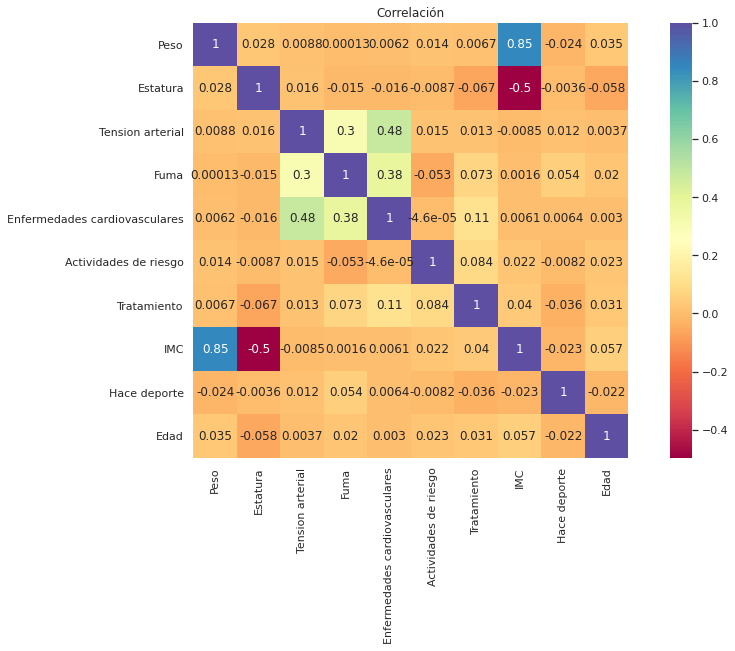

In [2288]:
cm = sns.color_palette("Spectral", as_cmap=True)
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot = True, square=True, cmap=cm)
plt.title('Correlación')
plt.show()

Para dividir a los clientes entre aquellos que obtendran la poliza automaticamente y aquellos que tendran que presentar mas estudios se usaron los siguientes features que se consideraron como relevantes.

In [2289]:
features_model = [
    'Fuma', 
    'Actividades de riesgo',
    'Tension arterial',
    'Enfermedades cardiovasculares',
    'Tratamiento',
    'IMC',
    'Hace deporte',
    'Edad'
]
selected_data = df[features_model]

In [2290]:
scaler = MinMaxScaler()
scaler.fit(selected_data)
scaled_data = scaler.transform(selected_data)

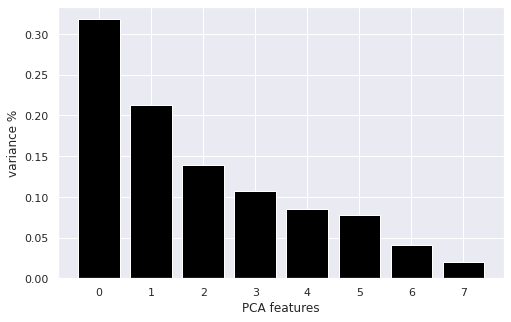

In [2291]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(scaled_data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pandas.DataFrame(principalComponents)

Se utiliza KMeans para clusterizar a los clientes y ver a que clusters se les otorgara la poliza.

In [2292]:
pca = PCA(4)
PCA_dataset = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(PCA_dataset)

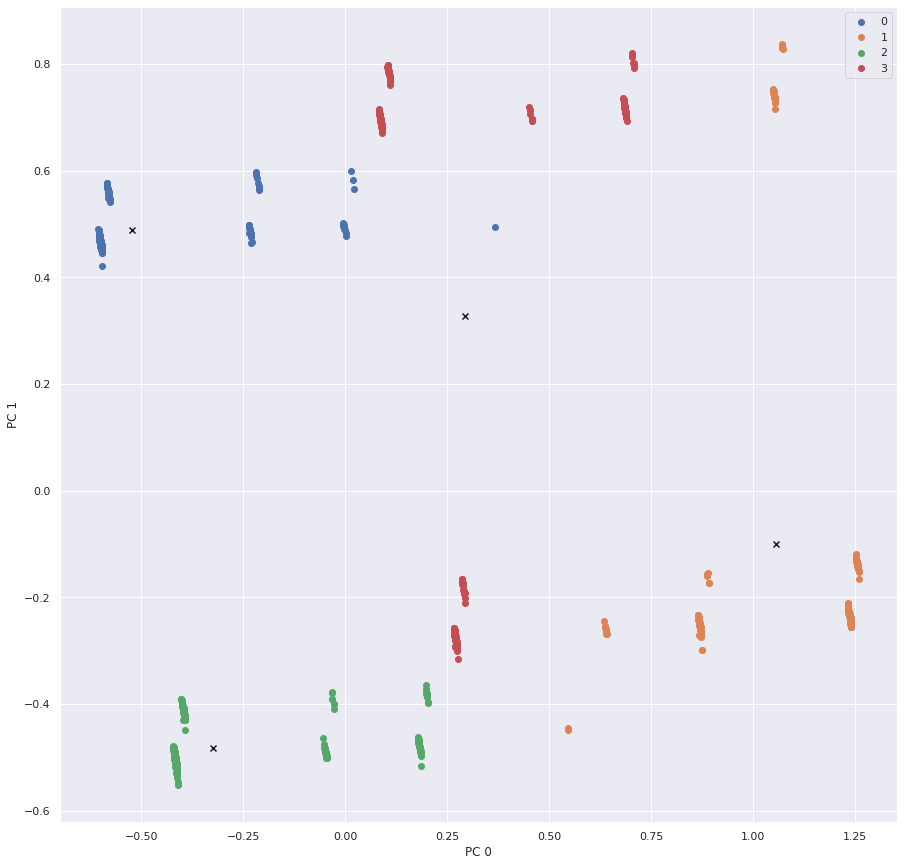

In [2293]:
centers = np.array(kmeans.cluster_centers_)

plt.figure(figsize=(15,15))
uniq = np.unique(label)

for i in uniq:
  plt.scatter(PCA_dataset[label == i , 0] , PCA_dataset[label == i , 1], label = i)
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.legend()
plt.show()

In [2294]:
df['CLUSTER'] = label
df.head(10)

,Nombre y Apellido,Fecha de nacimiento,Peso,Estatura,Deportes,Tension arterial,Fuma,Enfermedades cardiovasculares,Actividades de riesgo,Tratamiento,IMC,Hace deporte,Edad,CLUSTER
0,Michael Turner,1985-09-25,50,177,,1,1,1,0,1,15.959654,0,35,1
1,Scott Hunter,1956-06-23,72,167,,1,1,1,0,1,25.816630,0,64,1
2,Eric Thompson,1931-12-12,45,191,,0,0,0,0,1,12.335188,0,89,2
3,Dr. Robert York MD,1943-01-21,60,161,,1,1,1,0,1,23.147255,0,78,1
4,Jesse Cabrera,1982-01-19,51,177,,0,0,0,0,1,16.278847,0,39,2
5,Ashley Jones,1952-04-15,94,190,,1,1,1,0,1,26.038781,0,69,1
6,Shawn Valentine,1990-02-18,99,179,,0,0,0,0,1,30.897912,0,31,2
7,Danny Lowery,1948-11-09,53,170,,1,1,1,0,1,18.339100,0,72,1
8,Cody Allen,1935-05-17,92,191,,0,0,0,0,1,25.218607,0,86,2
9,Timothy Lloyd,1986-06-12,77,164,,1,1,1,0,1,28.628792,0,35,1


In [2295]:
df[df['CLUSTER'] == 0].describe()

,Peso,Estatura,Tension arterial,Fuma,Enfermedades cardiovasculares,Actividades de riesgo,Tratamiento,IMC,Hace deporte,Edad,CLUSTER
count,248.000000,248.000000,248.0,248.000000,248.000000,248.000000,248.0,248.000000,248.000000,248.000000,248.0
mean,71.213710,174.919355,0.0,0.100806,0.060484,0.008065,0.0,23.620536,0.197581,58.931452,0.0
std,15.863751,11.910324,0.0,0.301681,0.238863,0.089621,0.0,6.314382,0.398979,17.559596,0.0
min,45.000000,155.000000,0.0,0.000000,0.000000,0.000000,0.0,12.488043,0.000000,30.000000,0.0
25%,58.000000,165.000000,0.0,0.000000,0.000000,0.000000,0.0,18.796023,0.000000,44.000000,0.0
50%,71.000000,174.500000,0.0,0.000000,0.000000,0.000000,0.0,22.849746,0.000000,59.000000,0.0
75%,84.000000,186.000000,0.0,0.000000,0.000000,0.000000,0.0,28.211958,0.000000,74.000000,0.0
max,99.000000,194.000000,0.0,1.000000,1.000000,1.000000,0.0,40.680473,1.000000,89.000000,0.0


Se decide que los clientes que pertenecen al cluster 0 seran los que reciban la poliza de manera automatica. Esto se debe a que en promedio su IMC es de 23 y eso es saludable. Ademas, la tension arterial de todos es 0, la gran mayoria no tiene enfermedades cardiovasculares y no han estado en tratamiento por otro tipo de enfermedades. En general son personas jovenes ya que el promedio de edad es de 58 años y casi no realizan actividades de alto riesgo.
De cualquier manera, a quienes pertenezcan a este cluster y tengan un IMC mayor a 30 se les pedira mas examenes.

In [2296]:
df[df['CLUSTER'] == 1].describe()

,Peso,Estatura,Tension arterial,Fuma,Enfermedades cardiovasculares,Actividades de riesgo,Tratamiento,IMC,Hace deporte,Edad,CLUSTER
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.0
mean,72.022989,174.373563,0.988506,0.672414,0.948276,0.028736,0.867816,23.896998,0.183908,60.764368,1.0
std,15.601228,11.646706,0.106901,0.470688,0.222109,0.167545,0.339668,5.715862,0.388527,17.858684,0.0
min,45.000000,155.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.478299,0.000000,30.000000,1.0
25%,57.250000,164.250000,1.000000,0.000000,1.000000,0.000000,1.000000,19.491412,0.000000,45.000000,1.0
50%,73.000000,175.000000,1.000000,1.000000,1.000000,0.000000,1.000000,23.469568,0.000000,62.000000,1.0
75%,85.000000,183.000000,1.000000,1.000000,1.000000,0.000000,1.000000,27.698744,0.000000,76.000000,1.0
max,99.000000,194.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.207076,1.000000,89.000000,1.0


En este caso, se pedirian mas estudios, principalmente porque la mayoria sufren o han sufrido enfermedades cardiovasculares y ya han recibido tratamientos por otras afecciones. Ademas, muchos fuman y tienen presion arterial alta pero ya se vio que esto no es un indicador fuerte de muerte cardiaca.

In [2297]:
df[df['CLUSTER'] == 2].describe()

,Peso,Estatura,Tension arterial,Fuma,Enfermedades cardiovasculares,Actividades de riesgo,Tratamiento,IMC,Hace deporte,Edad,CLUSTER
count,362.000000,362.000000,362.0,362.000000,362.000000,362.000000,362.0,362.000000,362.000000,362.000000,362.0
mean,71.425414,173.301105,0.0,0.066298,0.107735,0.030387,1.0,24.123697,0.187845,61.193370,2.0
std,16.374807,12.020317,0.0,0.249147,0.310474,0.171887,0.0,6.510121,0.391129,17.307106,0.0
min,45.000000,155.000000,0.0,0.000000,0.000000,0.000000,1.0,12.335188,0.000000,30.000000,2.0
25%,58.000000,162.000000,0.0,0.000000,0.000000,0.000000,1.0,18.874585,0.000000,47.000000,2.0
50%,70.000000,173.000000,0.0,0.000000,0.000000,0.000000,1.0,23.656408,0.000000,62.000000,2.0
75%,86.000000,184.000000,0.0,0.000000,0.000000,0.000000,1.0,28.555444,0.000000,76.750000,2.0
max,99.000000,194.000000,0.0,1.000000,1.000000,1.000000,1.0,40.163901,1.000000,89.000000,2.0


A los clientes del cluster 2, se les daria la poliza de manera automatica ya que lo unico que tienen en su contra es que recibieron tratamiento por enfermedades no cardiacas pero no han tenido enfermedades cardiovasculares ni tampoco tienen presion alta. Ademas, se puede ver que su IMC es saludable y en su mayoria no son fumadores. 
Al igual que con el Cluster 0, pediria analisis a las personas con IMC mayor a 30, especialmente a las que ya han recibido tratamientos. Tambien se podria evaluar que decision tomar con aquellas personas de cluster 2 que son muy ancianas, por ejemplo mayores de 85, y ya han recibido tratamientos.

In [2298]:
df[df['CLUSTER'] == 3].describe()

,Peso,Estatura,Tension arterial,Fuma,Enfermedades cardiovasculares,Actividades de riesgo,Tratamiento,IMC,Hace deporte,Edad,CLUSTER
count,216.000000,216.000000,216.0,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.0
mean,71.351852,174.495370,1.0,0.037037,0.194444,0.023148,0.402778,23.710418,0.212963,59.740741,3.0
std,15.678642,11.169726,0.0,0.189291,0.396692,0.150723,0.491596,6.090973,0.410353,17.574755,0.0
min,45.000000,155.000000,1.0,0.000000,0.000000,0.000000,0.000000,13.019449,0.000000,30.000000,3.0
25%,57.000000,166.000000,1.0,0.000000,0.000000,0.000000,0.000000,18.771259,0.000000,43.750000,3.0
50%,72.000000,175.000000,1.0,0.000000,0.000000,0.000000,0.000000,23.043448,0.000000,60.000000,3.0
75%,85.000000,182.000000,1.0,0.000000,0.000000,0.000000,1.000000,27.765022,0.000000,77.000000,3.0
max,99.000000,194.000000,1.0,1.000000,1.000000,1.000000,1.000000,40.163901,1.000000,89.000000,3.0


Se considera que las personas del cluster 3 tambien obtendrian sin problema la poliza ya que el unico problema que tienen es la tension arterial alta pero ya se vio que esto no esta estrechamente ligado a la muerte por accidente cardiovascular. 
Al igual que en los casos anteriores, para ser conservadores, se puede pedir mas examenes a las personas con IMC mayor a 30 y a los ancianos que tengan tension arterial y hayan tenido ya enfermedades cardiovasculares.

# Parte 5

Para esta parte se usaran los 2 features principales del primer dataset ya que ademas de que en nuestro analisis fueron reconocidos como importantes, en el articulo correspondiente indica que son muy eficientes para predecir muertes por accidentes cardiovasculares. Estos features son serumcreatinine y ejection_fraction.
Se usaran 80% de los datos para entrenar el modelo y 20% para test.


En primer lugar se hara la prediccion con el dataset llamado dataOut.

In [2299]:
x = dataOut[['serum_creatinine', 'ejection_fraction']]
y = dataOut['DEATH_EVENT']

spl = 0.8
N = len(y)
sample = int(spl*N)
x_train, x_test, y_train, y_test = x[:sample], x[sample:], y[:sample], y[sample:]

Se leyo en el articulo que el metodo que arroja mejores resultados es el de Random Forest classifier. Por eso se lo tomo en cuenta, pero ademas se quiso probar la efectividad de SVM para poder comparar los resultados

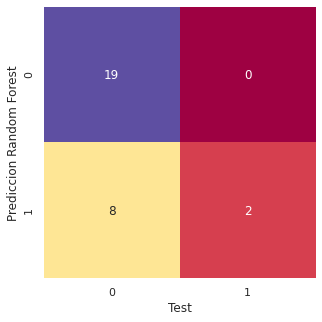

In [2300]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predRF=rfc.predict(x_test)
mat = confusion_matrix(y_test, predRF)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=cm)
plt.xlabel('Test')
plt.ylabel('Prediccion Random Forest')
plt.show()

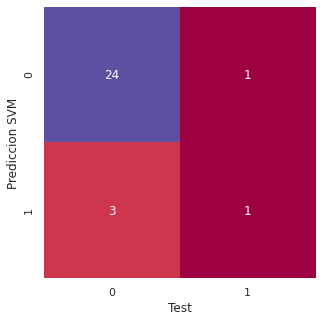

In [2301]:
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(x_train,y_train)
predSVM=svm.predict(x_test)
mat = confusion_matrix(y_test, predSVM)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=cm)
plt.xlabel('Test')
plt.ylabel('Prediccion SVM')
plt.show()

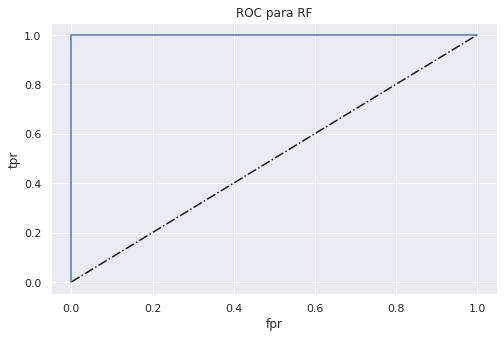

In [2302]:
probasRF = rfc.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probasRF[:, 1], pos_label=1)

plt.plot([0,1], [0,1], 'k-.')
plt.plot(fpr, tpr, label = 'RF')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC para RF')
plt.show()

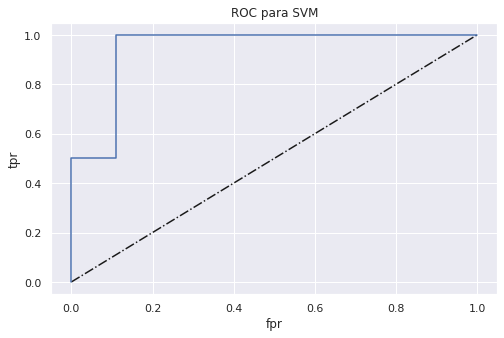

In [2303]:
probasSVM = svm.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probasSVM[:, 1], pos_label=1)

plt.plot([0,1], [0,1], 'k-.')
plt.plot(fpr, tpr, label = 'SVM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC para SVM')
plt.show()

In [2304]:
print(roc_auc_score(y_test, probasRF[:, 1]))
print(roc_auc_score(y_test, probasSVM[:, 1]))

1.0
0.9444444444444444


In [2305]:
print (classification_report(y_test,predRF))

              precision    recall  f1-score   support

           0       1.00      0.70      0.83        27
           1       0.20      1.00      0.33         2

    accuracy                           0.72        29
   macro avg       0.60      0.85      0.58        29
weighted avg       0.94      0.72      0.79        29



In [2306]:
print (classification_report(y_test,predSVM))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.25      0.50      0.33         2

    accuracy                           0.86        29
   macro avg       0.60      0.69      0.63        29
weighted avg       0.91      0.86      0.88        29



In [2307]:
pandas.DataFrame({'models': ["RF","SVM"],
                           'accuracies': [accuracy_score(y_test,predRF),accuracy_score(y_test,predSVM)]})

,models,accuracies
0,RF,0.724138
1,SVM,0.862069


Se puede observar que con Random Forest Classifier no se le daria la poliza a alguien que va a morir pero a su vez se pierden varios clientes porque se predice que moriran y eso no es asi al final.
Por otro lado, SVM da una poliza de manera erronea pero pierde menos clientes. 
Para decidir que metodo utilizar se puede consultar a la aseguradora si prefiere un enfoque mas conservador y perder algunos clientes (Random forest) o si prefiere arriesgarse y usar SVM asumiendo que la probabilidad de dar polizas erroneas existe pero no es demasiado alta.

Algo que llama la atencion es que la ROC de Random Forest es ideal.

Luego, se hizo la misma investigacion usando el dataset dataOut2.

In [2308]:
x = dataOut2[['serum_creatinine', 'ejection_fraction']]
y = dataOut2['DEATH_EVENT']

spl = 0.8
N = len(y)
sample = int(spl*N)
x_train, x_test, y_train, y_test = x[:sample], x[sample:], y[:sample], y[sample:]

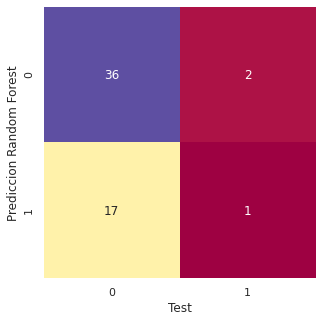

In [2309]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predRF=rfc.predict(x_test)
mat = confusion_matrix(y_test, predRF)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=cm)
plt.xlabel('Test')
plt.ylabel('Prediccion Random Forest')
plt.show()

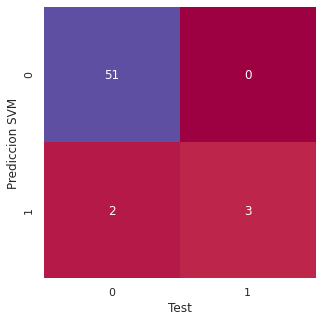

In [2310]:
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(x_train,y_train)
predSVM=svm.predict(x_test)
mat = confusion_matrix(y_test, predSVM)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=cm)
plt.xlabel('Test')
plt.ylabel('Prediccion SVM')
plt.show()

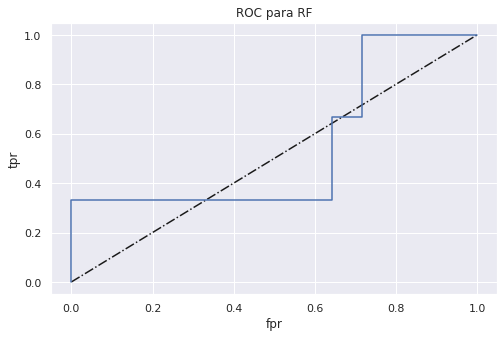

In [2311]:
probasRF = rfc.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probasRF[:, 1], pos_label=1)

plt.plot([0,1], [0,1], 'k-.')
plt.plot(fpr, tpr, label = 'RF')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC para RF')
plt.show()

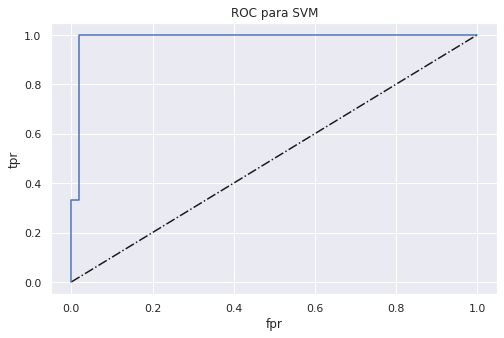

In [2312]:
probasSVM = svm.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probasSVM[:, 1], pos_label=1)

plt.plot([0,1], [0,1], 'k-.')
plt.plot(fpr, tpr, label = 'SVM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC para SVM')
plt.show()

In [2313]:
print(roc_auc_score(y_test, probasRF[:, 1]))
print(roc_auc_score(y_test, probasSVM[:, 1]))

0.5471698113207547
0.9874213836477987


In [2314]:
print (classification_report(y_test,predRF))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79        53
           1       0.06      0.33      0.10         3

    accuracy                           0.66        56
   macro avg       0.50      0.51      0.44        56
weighted avg       0.90      0.66      0.75        56



In [2315]:
print (classification_report(y_test,predSVM))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.60      1.00      0.75         3

    accuracy                           0.96        56
   macro avg       0.80      0.98      0.87        56
weighted avg       0.98      0.96      0.97        56



In [2316]:
pandas.DataFrame({'models': ["RF","SVM"],
                           'accuracies': [accuracy_score(y_test,predRF),accuracy_score(y_test,predSVM)]})

,models,accuracies
0,RF,0.660714
1,SVM,0.964286


Vemos que usando este dataset los resultados cambian y sin dudas de elegiria SVM sin necesidad de consultar a la aseguradora. Ya que random forest da 2 polizas a personas que moriran y niega polizas a 17 clientes que no moriran de accidente cardiovascular. Por otro lado, SVM no le da la poliza a pacientes que moriran y niega solo 2 polizas a clientes que no moriran.
Se puede ver que en este caso, la ROC que es casi perfecta es la de SVM.

# Parte 6

La calidad de los datos es muy importante. Esto se pudo ver claramente al trabajar con 2 datasets: dataOut y dataOut2. Estos arrojaron resultados muy distintos a pesar de que salian del mismo dataset. Con esto, se pudo observar que tener un buen dataset es mucho mas importante que la eleccion del modelo predictivo que se realice. 

Ademas, se vio que con un dataset sintetico y bastante randomico, la clasificacion que se puede ver en la grafica resulta en puntos muy dispersos aunque si esos puntos tengan cierta asociacion unos con otros. Esto fue muy distinto a todo lo que se trabajo durante el curso que incluia datos reales y que tenian sentido.

Por otro lado, es tambien importante conocer el area sobre la que se investiga. Por ejemplo, en nuestro caso, hubieramos pensado que la presion arterial era determinante y no era asi realmente.

Fue bueno probar mas de un modelo y no conformarse con una sola prediccion para poder comparar y ver que se ajusta mas a las necesidades reales del problema. No es sensato mirar solo numeros y resultados sino llevarlo a la vida real y ver que prefiero o que sirve mas al negocio.

Para concluir, se pudo aplicar lo aprendido en el curso en un problema real y lo consideramos muy gratificante.